# EDA-Home Credit

- Reading dataset
- Missing value analysis
- Transformation of dates 
- Univariate Analysis
- Analysing numerical columns
- Outliers
- Bivariate analysis

### Import the dataset

In [1]:
# Importing all the necessary libraries and warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

## Reading the data

In [2]:
# Reading the application_data csv dataset

application = pd.read_csv(r'C:\Users\91844\Desktop\My PGD DS\Data Toolkit\EDA Case Study/application_data.csv')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [4]:
application.shape

(307511, 122)

## Data Cleaning

### Fixing the columns

In [5]:
# Checking for the null values and data type

application.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
# Checking the percentage of missing values for all the columns

round(100 * (application.isnull().mean()),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [7]:
drop_cols = application.loc[:,'BASEMENTAREA_AVG':'EMERGENCYSTATE_MODE'].columns
application.drop(drop_cols, axis=1, inplace=True)

In [8]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [9]:
drop_cols = application.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
application.drop(drop_cols, axis=1, inplace=True)

In [10]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [11]:
round(100 * (application.isnull().mean()))

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OWN_CAR_AGE                    66.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                  

## Handling missing values

In [12]:
# OCCUPATION_TYPE

application.OCCUPATION_TYPE.fillna('Others', inplace = True)
application.OCCUPATION_TYPE.value_counts(normalize = True) * 100

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [13]:
# EXT_SOURCE columns

application.EXT_SOURCE_AVG = application.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)

In [14]:
application.EXT_SOURCE_AVG

0         0.161787
1         0.466757
2         0.642739
3         0.650442
4         0.322738
            ...   
307506    0.413601
307507    0.115992
307508    0.499536
307509    0.587593
307510    0.518984
Length: 307511, dtype: float64

## Handling Outliers

In [15]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650,0.05770,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,5.659614e-01,0.535276,0.08760,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.675053,6

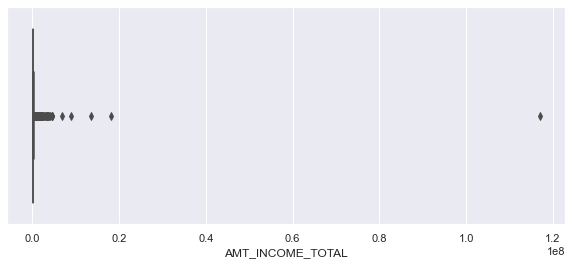

In [16]:
# Analysing AMT_INCOME_TOTAL

plt.figure(figsize=[10,4])
sns.boxplot(application.AMT_INCOME_TOTAL)
plt.show()

In [17]:
application.AMT_INCOME_TOTAL.quantile([.5, .7, .9, .95, .99, .999, .9999])

0.5000     147150.0
0.7000     180000.0
0.9000     270000.0
0.9500     337500.0
0.9900     472500.0
0.9990     900000.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [18]:
application[application.AMT_INCOME_TOTAL > 2250000.0]
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
application = application[~(application.AMT_INCOME_TOTAL > 0.2*10**8)]
application.shape

(307510, 56)

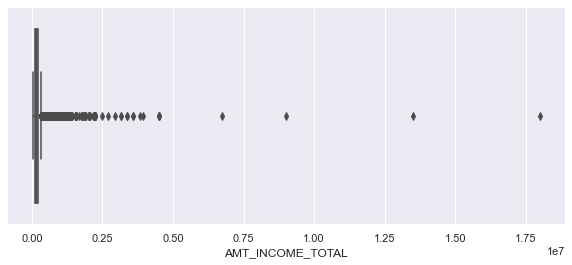

In [20]:
# plotting AMT_INCOME_TOTAL again

plt.figure(figsize=[10,4])
sns.boxplot(application.AMT_INCOME_TOTAL)
plt.show()

In [21]:
# Analysing AMT_CREDIT

application.AMT_CREDIT.describe()

count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

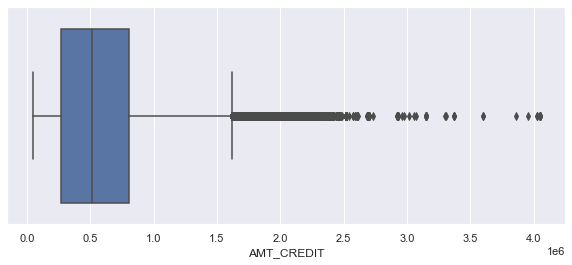

In [22]:
plt.figure(figsize=[10,4])
sns.boxplot(application.AMT_CREDIT)
plt.show()

In [23]:
application.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [24]:
# Checking values above 0.99 quantile

application[application.AMT_CREDIT > 1854000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514,-64.0,-2793,NaN,1,1,0,1,0,1,Core staff,3.0,1,1,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.380092,0.693358,NaN,0.4753,0.0,0.0,0.0,0.0,-926.0,0.0,0.0,0.0,0.0,0.0,3.0
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,-14216,-365,-3183.0,-4423,13.0,1,1,1,1,0,0,Core staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,0.558582,0.748204,0.739412,0.2227,0.0,0.0,0.0,0.0,-2421.0,0.0,0.0,0.0,0.0,0.0,1.0
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,-14966,-6158,-954.0,-4979,6.0,1,1,0,1,1,0,Core staff,4.0,2,2,FRIDAY,13,0,0,0,0,0,0,Police,NaN,0.682320,0.692559,0.1763,0.0,0.0,0.0,0.0,-1014.0,0.0,0.0,0.0,0.0,0.0,1.0
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,-18268,-2569,-4292.0,-1699,1.0,1,1,0,1,1,1,Managers,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Trade: type 3,0.746108,0.774368,0.344155,0.1814,0.0,0.0,0.0,0.0,-523.0,0.0,0.0,0.0,0.0,4.0,1.0
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994,-5893.0,-4106,7.0,1,1,0,1,0,0,Core staff,2.0,2,2,MONDAY,16,0,0,0,0,0,0,Security Ministries,NaN,0.503266,NaN,0.1485,1.0,0.0,1.0,0.0,-2675.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,1755000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.072508,-19981,-3665,-5642.0,-3402,NaN,1,1,0,1,0,0,Medicine staff,2.0,1,1,TUESDAY,13,0,0,0,0,0,0,Medicine,NaN,0.747726,0.624615,0.3175,1.0,0.0,1.0,0.0,-1866.0,0.0,0.0,0.0,0.0,0.0,5.0
307095,455785,0,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,1800000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,-20296,365243,-5953.0,-1633,3.0,1,0,0,1,0,0,Others,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,XNA,0.546025,0.212177,0.746300,0.1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-10595,-3636,-1100.0,-1099,6.0,1,1,0,1,0,0,Accountants,2.0,1,1,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.681877,0.688314,NaN,0.3629,14.0,1.0,14.0,1.0,-698.0,0.0,0.0,0.0,0.0,1.0,4.0
307214,455922,0,Cash loans,M,Y,N,2,256500.0,2290743.0,60556.5,204750

In [25]:
# Analysing AMT_GOODS_PRICE

application.AMT_GOODS_PRICE.describe()

count    3.072320e+05
mean     5.383965e+05
std      3.694470e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

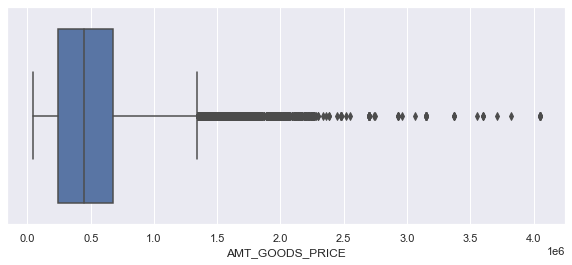

In [26]:
plt.figure(figsize=[10,4])
sns.boxplot(application.AMT_GOODS_PRICE)
plt.show()

In [27]:
# Analysing DAYS_BIRTH

application.DAYS_BIRTH.describe()

count    307510.000000
mean     -16037.006195
std        4363.991364
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [28]:
application['AGE'] = np.ceil(application.DAYS_BIRTH / -365)
application.AGE.describe()

count    307510.000000
mean         44.433121
std          11.954500
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

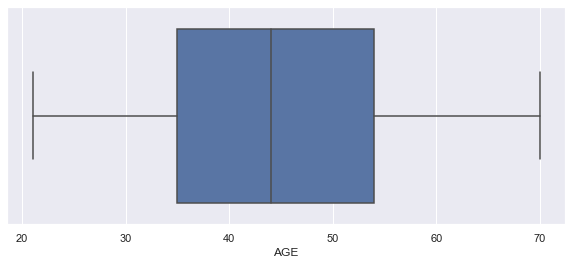

In [29]:
plt.figure(figsize=[10,4])
sns.boxplot(application.AGE)
plt.show()

## Standardising Values

In [30]:
# Next, we also need to convert the column DAYS_EMPLOYED.

application.DAYS_EMPLOYED.describe()

count    307510.000000
mean      63815.256424
std      141275.947995
min      -17912.000000
25%       -2760.000000
50%       -1213.500000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [31]:
application['EXPERIENCE'] = np.round(application.DAYS_EMPLOYED / -365, 1)

In [32]:
application.EXPERIENCE.describe()

count    307510.000000
mean       -174.842540
std         387.070526
min       -1000.700000
25%           0.800000
50%           3.300000
75%           7.600000
max          49.100000
Name: EXPERIENCE, dtype: float64

In [33]:
# Let's inspect the negative values in Experience column

application[application.EXPERIENCE < 0].EXPERIENCE.value_counts()

-1000.7    55374
Name: EXPERIENCE, dtype: int64

In [34]:
application.loc[application.EXPERIENCE < 0, 'EXPERIENCE'] = np.NaN

In [35]:
application.loc[application.EXPERIENCE < 0, 'EXPERIENCE'].value_counts()

Series([], Name: EXPERIENCE, dtype: int64)

In [36]:
# Checking NAME_FAMILY_STATUS column

application.NAME_FAMILY_STATUS.value_counts()

Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [37]:
application.NAME_FAMILY_STATUS.replace({'Single / not married' : 'Single', 'Civil marriage' : 'Married'}, inplace = True)

In [38]:
application = application[~(application.NAME_FAMILY_STATUS == 'Unknown')]

In [39]:
application[(application.NAME_FAMILY_STATUS == 'Unknown')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EXPERIENCE


In [40]:
application.NAME_FAMILY_STATUS.value_counts()

Married      226206
Single        45444
Separated     19770
Widow         16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [41]:
# Checking CODE_GENDER column

application.CODE_GENDER.value_counts()

F      202446
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [42]:
application.CODE_GENDER.value_counts(normalize = True) * 100

F      65.834385
M      34.164314
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [43]:
# Checking NAME_CONTRACT_TYPE column

application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278231
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

In [44]:
application.NAME_CONTRACT_TYPE.value_counts(normalize = True) * 100

Cash loans         90.479272
Revolving loans     9.520728
Name: NAME_CONTRACT_TYPE, dtype: float64

In [45]:
# Checking CREDIT_BUREAU_TOTAL column

## There are multiple columns for Credit inquiries so we can just put them into single column.

application['CREDIT_BUREAU_TOTAL'] = application.iloc[:, -9:-3].sum(axis = 1)

In [46]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307496 non-null  float64
 10  AMT_GOODS_PRICE              307232 non-null  float64
 11  NAME_TYPE_SUITE              306218 non-null  object 
 12  NAME_INCOME_TYPE             307508 non-null  object 
 13 

In [47]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EXPERIENCE,CREDIT_BUREAU_TOTAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,1.7,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.3,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.6,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,53.0,8.3,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.3,-1106.0


In [48]:
# Reading the previous_application csv dataset

previous_app = pd.read_csv(r'C:\Users\91844\Desktop\My PGD DS\Data Toolkit\EDA Case Study/previous_application.csv')
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting the dataset

In [49]:
previous_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [50]:
previous_app.shape

(1670214, 37)

## Analyzing the dataset

In [51]:
# Checking for the null values and data type.

previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [52]:
# Finding the percentage of missing values for all the columns.
# Checking for the Null values and rounding off for the clarity.

previous_app.isna().mean().round(2) * 100

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

In [53]:
previous_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [54]:
previous_app.NAME_CONTRACT_STATUS.value_counts(normalize = True) * 100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [55]:
# Checking FLAG_LAST_APPL_PER_CONTRACT column

previous_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize = True) * 100

Y    99.49258
N     0.50742
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [56]:
# Let's keep only the last applicatins and drop rest

previous_app = previous_app[previous_app.FLAG_LAST_APPL_PER_CONTRACT == 'Y']
previous_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize = True) * 100

Y    100.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [57]:
# Checking NFLAG_LAST_APPL_IN_DAY column

previous_app.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize = True) * 100

1    99.9527
0     0.0473
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [58]:
## It looks like there are still many previous applications, we need to drop these as well.
## Let's sort it on the basis of applications id and drop duplicates.

previous_app = previous_app.sort_values('SK_ID_PREV', ascending = False).drop_duplicates('SK_ID_CURR')

In [59]:
previous_app.shape

(338857, 37)

In [60]:
# Checking DAYS_TERMINATION column

previous_app[previous_app.DAYS_TERMINATION > 0]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
888701,2843497,451578,Cash loans,9175.185,132482.97,149969.97,NaN,132482.97,WEDNESDAY,11,Y,0,NaN,NaN,NaN,XNA,Approved,-618,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash Street: middle,365243.0,-588.0,102.0,365243.0,365243.0,1.0
1345642,2843496,425374,Revolving loans,31500.000,630000.00,630000.00,NaN,630000.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XAP,Approved,-465,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,-454.0,-423.0,365243.0,365243.0,365243.0,0.0
298226,2843493,337804,Revolving loans,2250.000,45000.00,45000.00,NaN,45000.00,THURSDAY,17,Y,1,NaN,NaN,NaN,XAP,Approved,-459,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,-438.0,-410.0,365243.0,365243.0,365243.0,0.0
1489940,2843491,107385,Cash loans,25421.985,841500.00,963684.00,NaN,841500.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-304,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,60.0,low_action,Cash X-Sell: low,365243.0,-274.0,1496.0,365243.0,365243.0,1.0
728908,2843487,424008,Consumer loans,7179.795,78402.87,78399.00,3.87,78402.87,FRIDAY,15,Y,1,0.000054,NaN,NaN,XAP,Approved,-264,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Country-wide,150,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-233.0,97.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372316,1000248,380704,Consumer loans,5629.050,148995.00,148995.00,0.00,148995.00,MONDAY,20,Y,1,0.000000,NaN,NaN,XAP,Approved,-441,Cash through the bank,XAP,NaN,New,Homewares,POS,XNA,Regional / Local,30,Construction,36.0,low_normal,POS other with interest,365243.0,-399.0,651.0,365243.0,365243.0,0.0
33706,1000163,331428,Consumer loans,15775.515,268200.00,302787.00,0.00,268200.00,WEDNESDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-349,Cash through the bank,XAP,Unaccompanied,New,Education,POS,XNA,Stone,100,Industry,24.0,low_normal,POS industry with interest,365243.0,-318.0,372.0,365243.0,365243.0,0.0
588245,1000148,373582,Consumer loans,25941.015,348633.00,278905.50,69727.50,348633.00,SUNDAY,13,Y,1,0.217821,NaN,NaN,XAP,Approved,-233,Cash through the bank,XAP,Family,New,Clothing and Accessories,POS,XNA,Regional / Local,100,Clothing,12.0,low_normal,POS industry without interest,365243.0,-203.0,127.0,365243.0,365243.0,0.0
1325772,1000145,357802,Consumer loans,15884.730,92925.00,88047.00,9292.50,92925.00,WEDNESDAY,12,Y,1,0.103970,NaN,NaN,XAP,Approved,-146,Cash through the bank,XAP,Unaccompanied,New,Gardening,POS,XNA,Stone,100,Construction,6.0,low_normal,POS industry with interest,365243.0,-116.0,34.0,365243.0,365243.0,1.0


In [61]:
previous_apps = previous_app[['SK_ID_CURR', 'NAME_CONTRACT_STATUS', 'AMT_CREDIT', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION']]

In [62]:
previous_apps.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,AMT_CREDIT,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
205485,406596,Unused offer,30912.75,CLIENT,XNA,NaN
717142,140761,Unused offer,41499.00,CLIENT,XNA,NaN
886179,237546,Refused,60673.50,LIMIT,middle,NaN
359118,100125,Refused,59503.50,SCO,middle,NaN
70058,250234,Refused,108180.00,SCO,low_action,NaN


## Renaming the columns

In [63]:
# The names of the columns are same in our both databases so let's rename the columns in previous_apps database.

renames = {'NAME_CONTRACT_STATUS' : 'PREV_NAME_CONTRACT_STATUS', 'AMT_CREDIT' : 'PREV_AMT_CREDIT', 'CODE_REJECT_REASON' : 'PREV_CODE_REJECT_REASON', 'NAME_YIELD_GROUP' : 'PREV_NAME_YIELD_GROUP', 'DAYS_TERMINATION':'PREV_DAYS_TERMINATION'}
previous_apps = previous_apps.rename(columns = renames)

In [64]:
previous_apps.head()

,SK_ID_CURR,PREV_NAME_CONTRACT_STATUS,PREV_AMT_CREDIT,PREV_CODE_REJECT_REASON,PREV_NAME_YIELD_GROUP,PREV_DAYS_TERMINATION
205485,406596,Unused offer,30912.75,CLIENT,XNA,NaN
717142,140761,Unused offer,41499.00,CLIENT,XNA,NaN
886179,237546,Refused,60673.50,LIMIT,middle,NaN
359118,100125,Refused,59503.50,SCO,middle,NaN
70058,250234,Refused,108180.00,SCO,low_action,NaN


In [65]:
previous_apps.describe()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_DAYS_TERMINATION
count,338857.000000,3.388570e+05,241613.000000
mean,278149.909581,1.696456e+05,84373.947213
std,102879.193103,2.750492e+05,154783.432532
min,100001.000000,0.000000e+00,-2844.000000
25%,189061.000000,3.195000e+04,-1180.000000
50%,278221.000000,7.938000e+04,-421.000000
75%,367302.000000,1.755000e+05,-26.000000
max,456255.000000,4.050000e+06,365243.000000


In [66]:
# Checking PREV_DAYS_TERMINATION column

previous_apps.PREV_DAYS_TERMINATION.value_counts(normalize=True)

 365243.0    0.232947
-9.0         0.000911
-15.0        0.000906
-17.0        0.000902
-144.0       0.000902
               ...   
-2785.0      0.000004
-2796.0      0.000004
-2746.0      0.000004
-2804.0      0.000004
-2777.0      0.000004
Name: PREV_DAYS_TERMINATION, Length: 2785, dtype: float64

In [67]:
previous_apps.PREV_DAYS_TERMINATION[previous_apps.PREV_DAYS_TERMINATION > 0].value_counts()

365243.0    56283
Name: PREV_DAYS_TERMINATION, dtype: int64

In [68]:
# Replacing with NaN

previous_apps.PREV_DAYS_TERMINATION.replace({365243.0 : np.NaN}, inplace = True)
previous_apps.PREV_DAYS_TERMINATION[previous_apps.PREV_DAYS_TERMINATION > 0].value_counts()

Series([], Name: PREV_DAYS_TERMINATION, dtype: int64)

In [69]:
application = pd.merge(left = application, right = previous_apps, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EXPERIENCE,CREDIT_BUREAU_TOTAL,PREV_NAME_CONTRACT_STATUS,PREV_AMT_CREDIT,PREV_CODE_REJECT_REASON,PREV_NAME_YIELD_GROUP,PREV_DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,1.7,-1134.0,Approved,179055.0,XAP,low_normal,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.3,-828.0,Approved,348637.5,XAP,middle,-639.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.6,-815.0,Approved,20106.0,XAP,middle,-714.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,53.0,8.3,-617.0,Canceled,0.0,XAP,XNA,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.3,-1106.0,Approved,284400.0,XAP,middle,NaN


In [70]:
# Checking PREV_NAME_CONTRACT_STATUS for null values

application.PREV_NAME_CONTRACT_STATUS.isna().mean()

0.05350104712722921

In [71]:
# Filling these values with 'FirstApplied'.

application.PREV_NAME_CONTRACT_STATUS.fillna('FirstApplied',inplace= True)

In [72]:
application.PREV_NAME_CONTRACT_STATUS.value_counts()

Approved        214468
Canceled         38911
Refused          33118
FirstApplied     16452
Unused offer      4559
Name: PREV_NAME_CONTRACT_STATUS, dtype: int64

In [73]:
application.PREV_NAME_CONTRACT_STATUS.isna().mean()

0.0

## Univariate Analysis

In [74]:
# Analyzing Target column

application.TARGET.value_counts()

0    282684
1     24824
Name: TARGET, dtype: int64

In [75]:
application.TARGET.value_counts(normalize = True)

0    0.919274
1    0.080726
Name: TARGET, dtype: float64

In [76]:
# Let's categorise TARGET column where 1==default and 0==safe

application['TARGET_CATEGORY'] = application.TARGET.apply(lambda x: 'default' if x==1 else 'safe')
application.TARGET_CATEGORY.value_counts(normalize = True)

safe       0.919274
default    0.080726
Name: TARGET_CATEGORY, dtype: float64

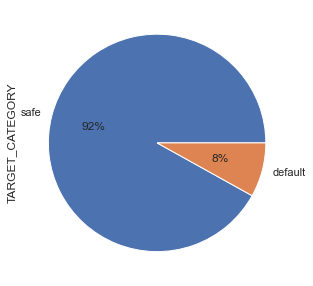

In [77]:
plt.figure(figsize=(5,5))
application.TARGET_CATEGORY.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [78]:
# NAME_EDUCATION_TYPE Bar chart

application.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218390
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

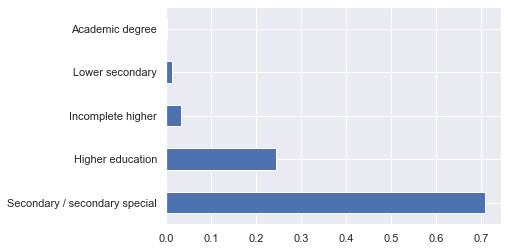

In [79]:
application.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

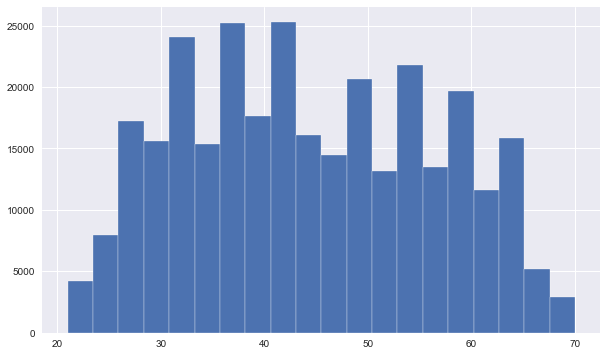

In [90]:
# Plotting a Histogram of AGE column

plt.style.use('seaborn')
plt.figure(figsize=[10,6])
plt.hist(application.AGE, bins = 20, edgecolor = 'white')
plt.show()

In [91]:
# Let's bin the age into groups as it is continuous and can be presented in a better way.

age_buckets = ['<30', '30-40', '40-50', '50-60', '60+']
application['AGE_GROUPS'] = pd.cut(application.AGE, [0,30,40,50,60,999], labels = age_buckets)

In [93]:
application.AGE_GROUPS.value_counts(normalize = True) * 100

30-40    26.765157
40-50    24.890735
50-60    22.133408
<30      14.640595
60+      11.570105
Name: AGE_GROUPS, dtype: float64

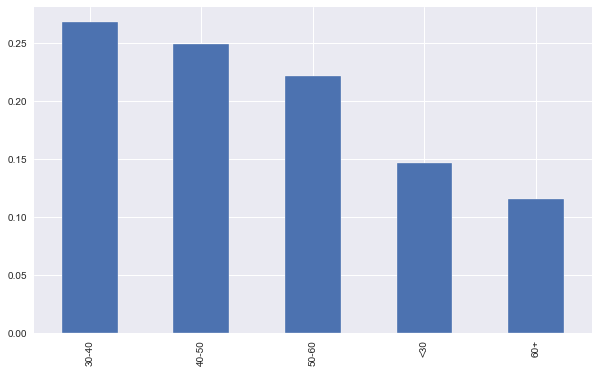

In [96]:
# Plotting a Bar graph for AGE_GROUPS column

plt.figure(figsize=[10,6])
application.AGE_GROUPS.value_counts(normalize = True).plot.bar()
plt.show()

In [97]:
# Plotting a Bar graph for NAME_FAMILY_STATUS column

application.NAME_FAMILY_STATUS.value_counts()

Married      226206
Single        45444
Separated     19770
Widow         16088
Name: NAME_FAMILY_STATUS, dtype: int64

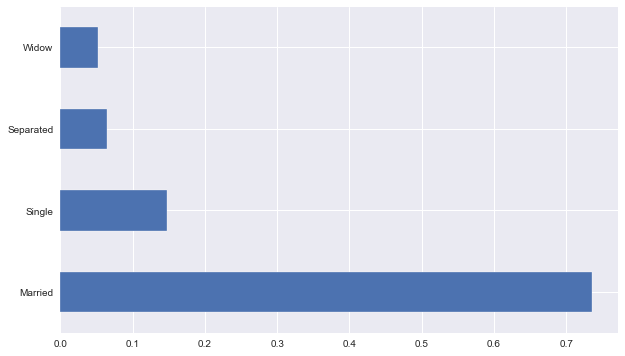

In [99]:
plt.figure(figsize=[10,6])
application.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.barh()
plt.show()

In [100]:
# Plotting a Bar graph for CODE_GENDER column

application.CODE_GENDER.value_counts(normalize=True) *100

F      65.834385
M      34.164314
XNA     0.001301
Name: CODE_GENDER, dtype: float64

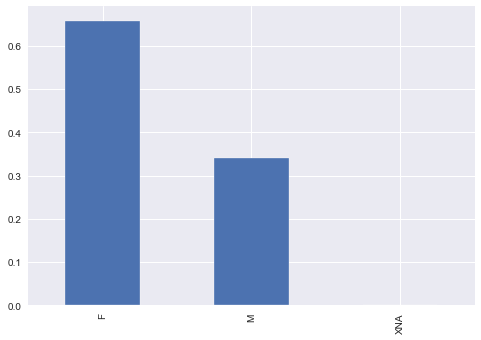

In [101]:
application.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.show()

In [102]:
# Plotting a Bar Graph for OCCUPATION_TYPE column

application.OCCUPATION_TYPE.value_counts(normalize=True) *100

Others                   31.345851
Laborers                 17.945875
Sales staff              10.439403
Core staff                8.965620
Managers                  6.949413
Drivers                   6.049599
High skill tech staff     3.700717
Accountants               3.190811
Medicine staff            2.776188
Security staff            2.185634
Cooking staff             1.933608
Cleaning staff            1.513131
Private service staff     0.862417
Low-skill Laborers        0.680633
Waiters/barmen staff      0.438363
Secretaries               0.424379
Realty agents             0.244221
HR staff                  0.183085
IT staff                  0.171052
Name: OCCUPATION_TYPE, dtype: float64

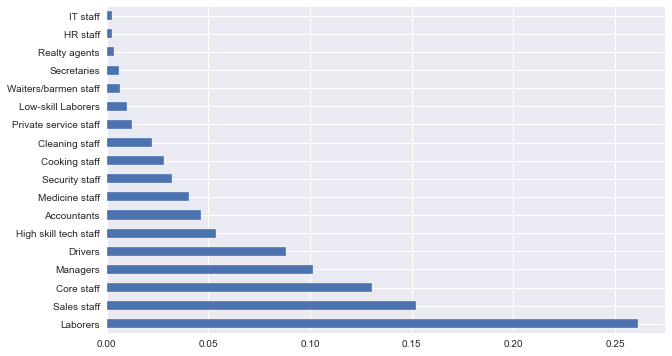

In [103]:
# Remving the 'Others' values as they are not necessary.

plt.figure(figsize=[10,6])
application[~(application.OCCUPATION_TYPE == 'Others')].OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

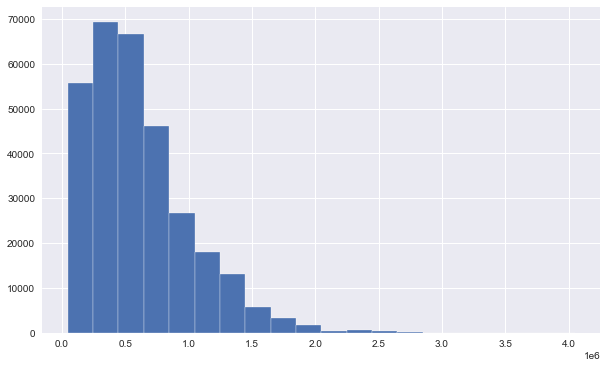

In [104]:
# Plotting a Histogram for AMT_CREDIT column

plt.figure(figsize=[10,6])
plt.hist(application.AMT_CREDIT, bins= 20, edgecolor='White')
plt.show()

In [105]:
# Plotting a Bar Graph for PREV_NAME_CONTRACT_STATUS column

application.PREV_NAME_CONTRACT_STATUS.value_counts(normalize = True) * 100

Approved        69.743877
Canceled        12.653655
Refused         10.769801
FirstApplied     5.350105
Unused offer     1.482563
Name: PREV_NAME_CONTRACT_STATUS, dtype: float64

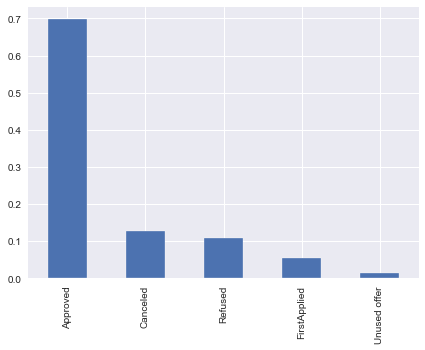

In [106]:
plt.figure(figsize=(7,5))
application.PREV_NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

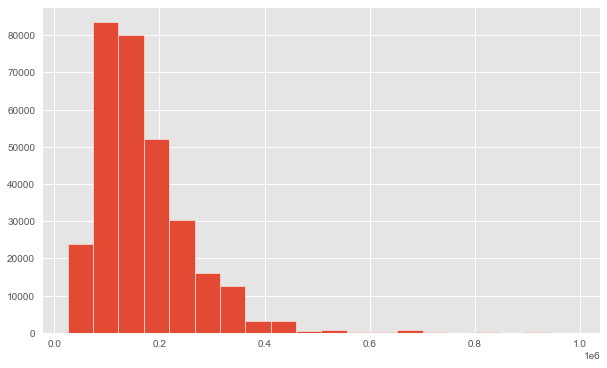

In [107]:
# Plotting a Histogram for AMT_INCOME_TOTAL column

plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.hist(application[application.AMT_INCOME_TOTAL < 10**6].AMT_INCOME_TOTAL, bins=20, edgecolor='White')
plt.show()

In [108]:
# Plotting a Bar Graph for FLAG_OWN_REALTY column

application.FLAG_OWN_REALTY.value_counts(normalize=True)*100

Y    69.366976
N    30.633024
Name: FLAG_OWN_REALTY, dtype: float64

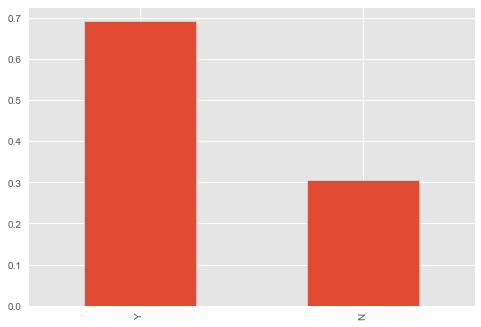

In [109]:
application.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.show()

## Bivariate Analysis

### Numeric - Categorical

In [113]:
# Bar Plot of Education level vs Income

application.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean', 'median'])

,mean,median
NAME_EDUCATION_TYPE,,
Academic degree,240009.146341,211500.0
Higher education,208652.135993,180000.0
Incomplete higher,181563.812397,157500.0
Lower secondary,129995.499869,112500.0
Secondary / secondary special,154623.483787,135000.0


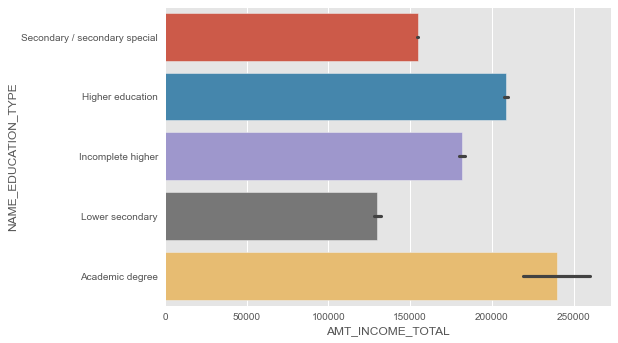

In [115]:
sns.barplot(application.AMT_INCOME_TOTAL, application.NAME_EDUCATION_TYPE)
plt.show()

In [116]:
# Bar Plot of Occupation type vs Total Income

application.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean', 'median'])

,mean,median
OCCUPATION_TYPE,,
Accountants,194577.550499,178218.0
Cleaning staff,130790.895551,112500.0
Cooking staff,138396.508176,126000.0
Core staff,172656.695254,157500.0
Drivers,187011.606413,180000.0
HR staff,188916.282416,158400.0
High skill tech staff,182842.045683,157500.0
IT staff,213465.601711,180000.0
Laborers,164240.355724,157500.0


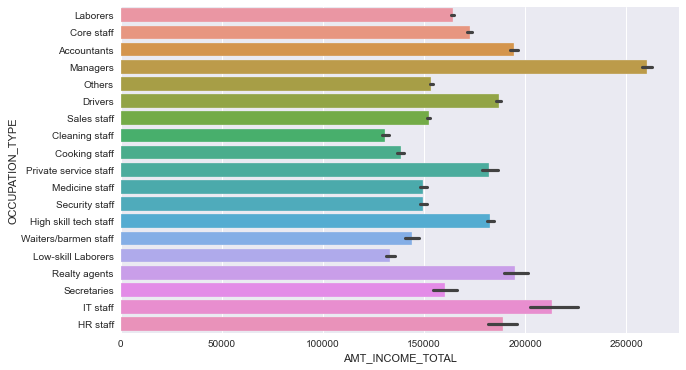

In [118]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
sns.barplot(application.AMT_INCOME_TOTAL, application.OCCUPATION_TYPE)
plt.show()

In [119]:
# Bar Plot of Marital status vs Amount of Credit requested

application.groupby('NAME_FAMILY_STATUS').AMT_CREDIT.aggregate(['mean', 'median'])

,mean,median
NAME_FAMILY_STATUS,,
Married,629649.621011,539590.50
Separated,552113.820410,477000.00
Single,505350.178835,431741.25
Widow,490695.908596,414229.50


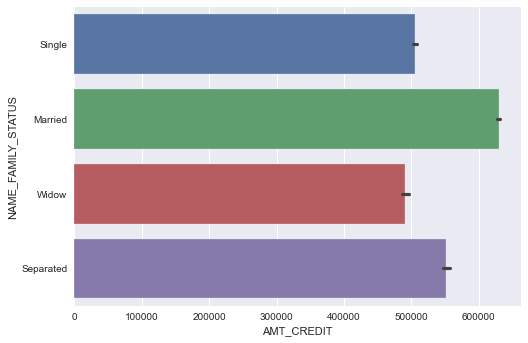

In [120]:
sns.barplot(application.AMT_CREDIT, application.NAME_FAMILY_STATUS)
plt.show()

In [121]:
# Bar Plot of Total Credit Bureau Searches vs Status of previous Loan Applications

application.groupby('PREV_NAME_CONTRACT_STATUS').CREDIT_BUREAU_TOTAL.aggregate(['mean', 'median'])

,mean,median
PREV_NAME_CONTRACT_STATUS,,
Approved,-997.703224,-816.0
Canceled,-963.913392,-738.0
FirstApplied,-368.955689,-4.0
Refused,-1014.937164,-842.0
Unused offer,-1045.785260,-937.0


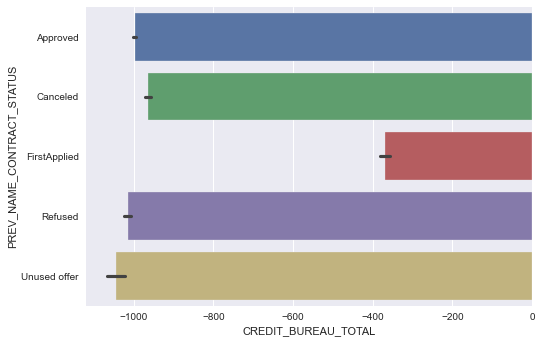

In [125]:
sns.barplot(application.CREDIT_BUREAU_TOTAL, application.PREV_NAME_CONTRACT_STATUS)
plt.show()

In [123]:
# BoxPlot of Amount of Credit requested vs Target Category

application.groupby('TARGET_CATEGORY').AMT_CREDIT.aggregate(['mean', 'median'])

,mean,median
TARGET_CATEGORY,,
default,557778.337838,497520.0
safe,602648.088487,517788.0


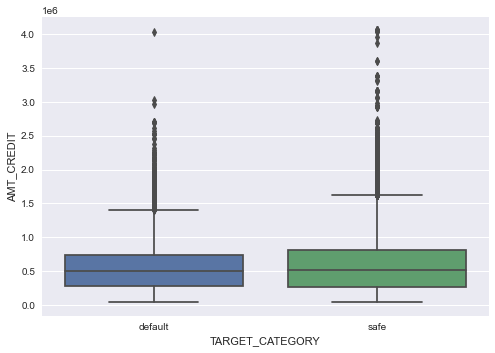

In [124]:
sns.boxplot(x=application.TARGET_CATEGORY, y=application.AMT_CREDIT)
plt.show()

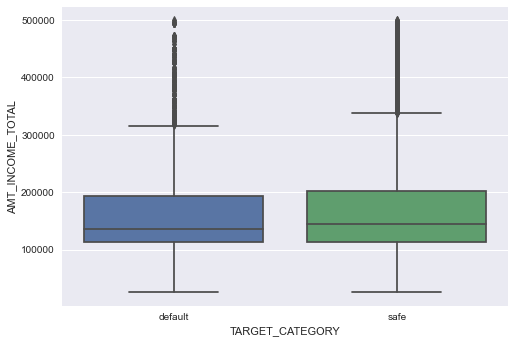

In [127]:
# BoxPlot of Amount of Income of applicants vs Target Category

sns.boxplot(x=application.TARGET_CATEGORY, y=application[application.AMT_INCOME_TOTAL < 0.5*10**6].AMT_INCOME_TOTAL)
plt.show()

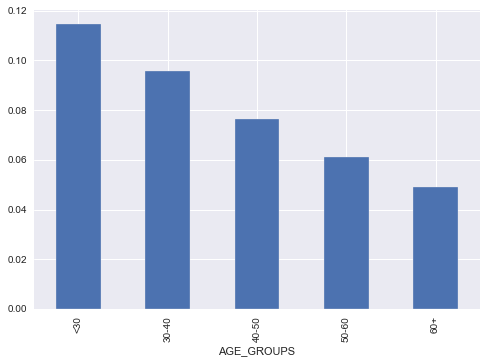

In [128]:
# Bar Plot of Age group of applicants vs Target

application.groupby('AGE_GROUPS').TARGET.mean().plot.bar()
plt.show()

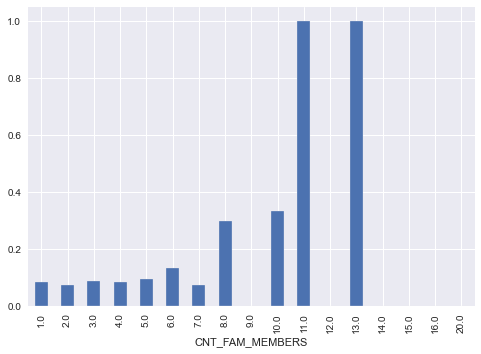

In [129]:
# Bar Plot of Count of Family Members of applicants vs Target

application.groupby('CNT_FAM_MEMBERS').TARGET.mean().plot.bar()
plt.show()

## Category - Category

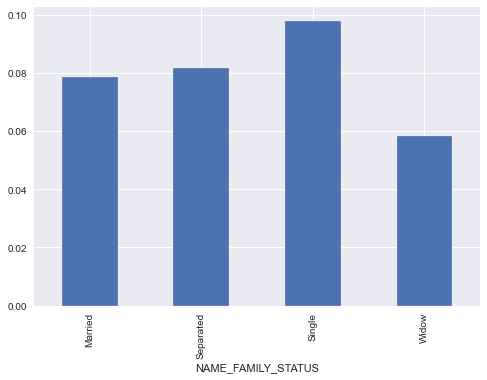

In [130]:
# Bar Plot of Family Status Categories of applicants vs Target

application.groupby('NAME_FAMILY_STATUS').TARGET.mean().plot.bar()
plt.show()

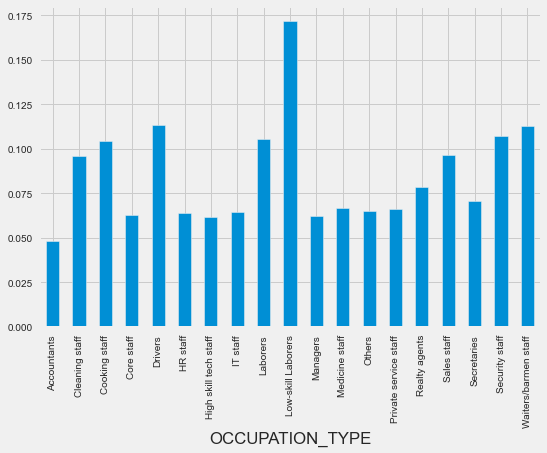

In [131]:
# Bar Plot of Occupation Types of applicants vs Target

plt.style.use('fivethirtyeight')
application.groupby('OCCUPATION_TYPE').TARGET.mean().plot.bar()
plt.show()

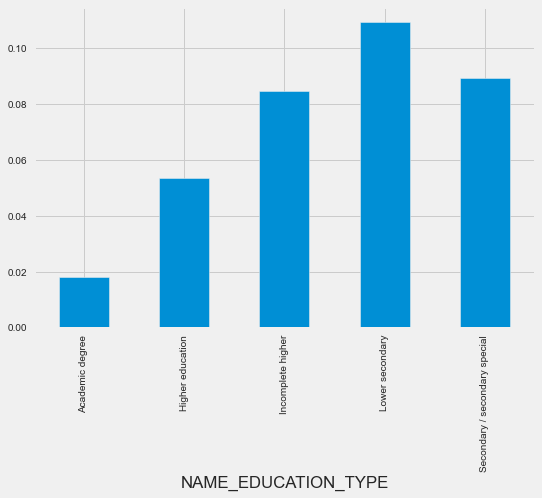

In [132]:
# Bar Plot of Education Types of applicants vs Target

application.groupby('NAME_EDUCATION_TYPE').TARGET.mean().plot.bar()
plt.show()

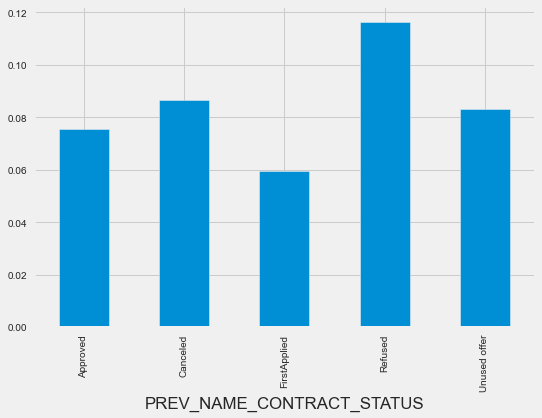

In [133]:
# Bar Plot of status of Previous applications of applicants vs Target

application.groupby('PREV_NAME_CONTRACT_STATUS').TARGET.mean().plot.bar()
plt.show()

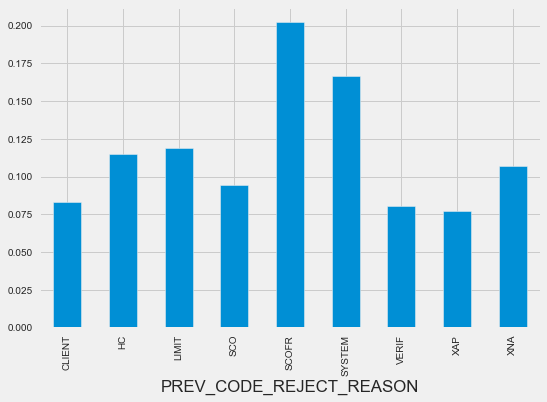

In [134]:
# Bar Plot of the reason of the rejection of applications vs Target

application.groupby('PREV_CODE_REJECT_REASON').TARGET.mean().plot.bar()
plt.show()

## Numeric - Numeric

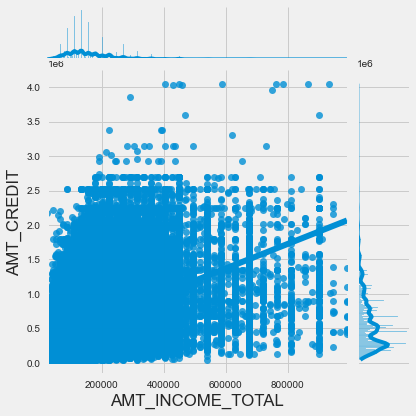

In [136]:
# JointPlot of Total Income vs Amount requested for Loan

sns.jointplot(data = application[application.AMT_INCOME_TOTAL <10**6], x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', kind = 'reg')
plt.show()

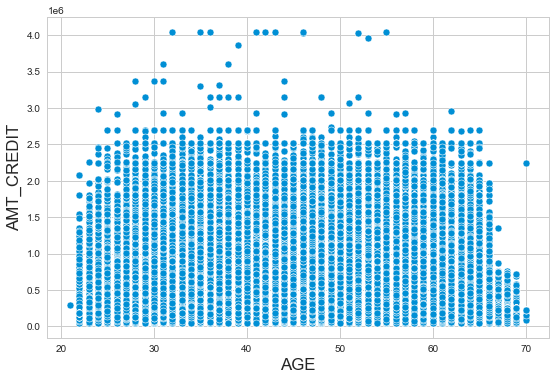

In [137]:
# ScatterPlot of AGE vs Amount of Credit requested

plt.style.use('seaborn-whitegrid')
sns.scatterplot(application.AGE, application.AMT_CREDIT)
plt.show()

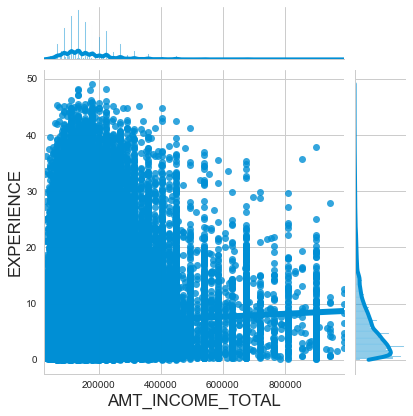

In [138]:
# JointPlot of Total Income of applicants vs Experience in Years

sns.jointplot(data = application[application.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y = 'EXPERIENCE', kind='reg')
plt.show()

## Multivariate Analysis

In [140]:
# NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs TARGET

res = pd.pivot_table(data = application, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_FAMILY_STATUS', values = 'TARGET')
res

NAME_FAMILY_STATUS,Married,Separated,Single,Widow
NAME_EDUCATION_TYPE,,,,
Academic degree,0.017544,0.000000,0.034483,0.000000
Higher education,0.051481,0.057346,0.062049,0.048094
Incomplete higher,0.081425,0.086643,0.094143,0.063584
Lower secondary,0.108170,0.138249,0.132988,0.067961
Secondary / secondary special,0.087434,0.089904,0.113243,0.059666


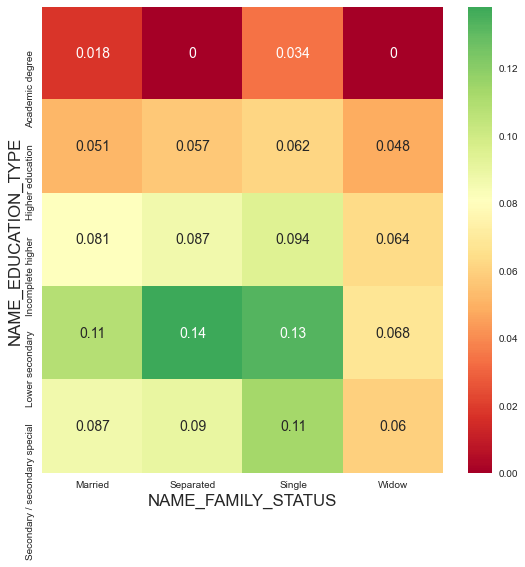

In [141]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.081)
plt.show()

In [142]:
# NAME_FAMILY_STATUS vs OCCUPATION_TYPE vs TARGET

res = pd.pivot_table(data=application, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
res

NAME_FAMILY_STATUS,Married,Separated,Single,Widow
OCCUPATION_TYPE,,,,
Accountants,0.045846,0.053352,0.058704,0.044521
Cleaning staff,0.097342,0.078652,0.122066,0.067265
Cooking staff,0.101545,0.084135,0.144550,0.059859
Core staff,0.060456,0.057576,0.080491,0.038880
Drivers,0.106101,0.145655,0.147986,0.153153
HR staff,0.056511,0.065217,0.066667,0.200000
High skill tech staff,0.059609,0.061252,0.072008,0.048327
IT staff,0.072674,0.000000,0.060000,0.000000
Laborers,0.101180,0.109462,0.132301,0.069250


In [143]:
application.TARGET.value_counts(normalize=True)

0    0.919274
1    0.080726
Name: TARGET, dtype: float64

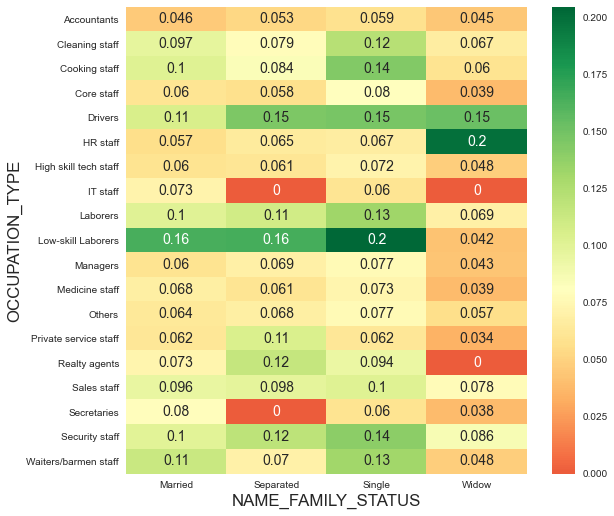

In [144]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.081)
plt.show()

In [145]:
# OCCUPATION_TYPE vs NAME_EDUCATION_TYPE vs TARGET

res = pd.pivot_table(data=application, index='OCCUPATION_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
res

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
OCCUPATION_TYPE,,,,,
Accountants,0.125000,0.038813,0.056180,0.166667,0.062077
Cleaning staff,0.000000,0.084000,0.102041,0.138889,0.095664
Cooking staff,0.000000,0.088993,0.093220,0.171875,0.105135
Core staff,0.000000,0.045670,0.083902,0.105691,0.078621
Drivers,0.000000,0.083415,0.103870,0.128514,0.117219
HR staff,NaN,0.044818,0.083333,NaN,0.100000
High skill tech staff,0.000000,0.047261,0.070085,0.129032,0.071405
IT staff,NaN,0.049853,0.038462,0.000000,0.113636
Laborers,0.000000,0.076011,0.086326,0.160274,0.109829


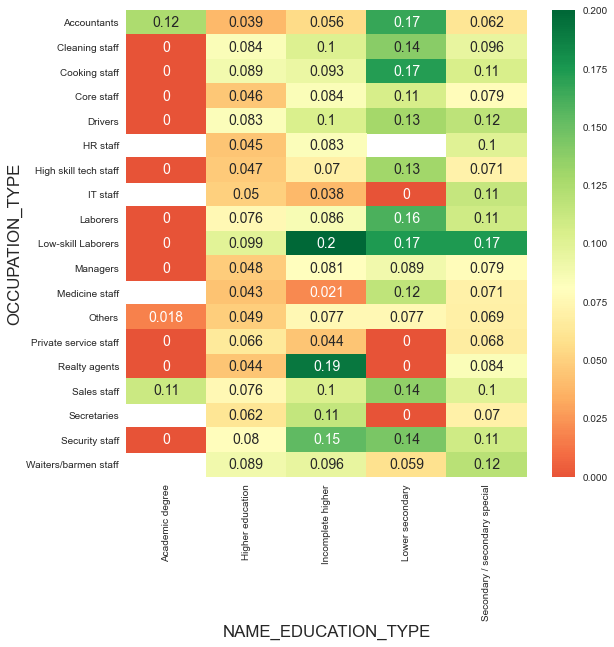

In [146]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot = True, cmap = 'RdYlGn', center = 0.081)
plt.show()

In [148]:
## Calculating the Correlation between TARGET, and other important numeric variables for the analysis.

res = application[['TARGET', 'AGE', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'CNT_FAM_MEMBERS', 'CREDIT_BUREAU_TOTAL', 'AMT_GOODS_PRICE', 'AGE', 'EXPERIENCE']].corr()
res

,TARGET,AGE,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,CREDIT_BUREAU_TOTAL,AMT_GOODS_PRICE,AGE,EXPERIENCE
TARGET,1.000000,-0.078232,-0.020457,-0.030369,0.009298,0.055189,-0.039644,-0.078232,-0.074958
AGE,-0.078232,1.000000,-0.056616,0.055392,-0.278894,-0.082839,0.053398,1.000000,0.352093
AMT_INCOME_TOTAL,-0.020457,-0.056616,1.000000,0.342172,0.032363,-0.044492,0.348698,-0.056616,0.032231
AMT_CREDIT,-0.030369,0.055392,0.342172,1.000000,0.063160,-0.073631,0.986968,0.055392,0.091299
CNT_FAM_MEMBERS,0.009298,-0.278894,0.032363,0.063160,1.000000,-0.027119,0.061186,-0.278894,-0.028886
CREDIT_BUREAU_TOTAL,0.055189,-0.082839,-0.044492,-0.073631,-0.027119,1.000000,-0.076240,-0.082839,-0.141655
AMT_GOODS_PRICE,-0.039644,0.053398,0.348698,0.986968,0.061186,-0.076240,1.000000,0.053398,0.093380
AGE,-0.078232,1.000000,-0.056616,0.055392,-0.278894,-0.082839,0.053398,1.000000,0.352093
EXPERIENCE,-0.074958,0.352093,0.032231,0.091299,-0.028886,-0.141655,0.093380,0.352093,1.000000


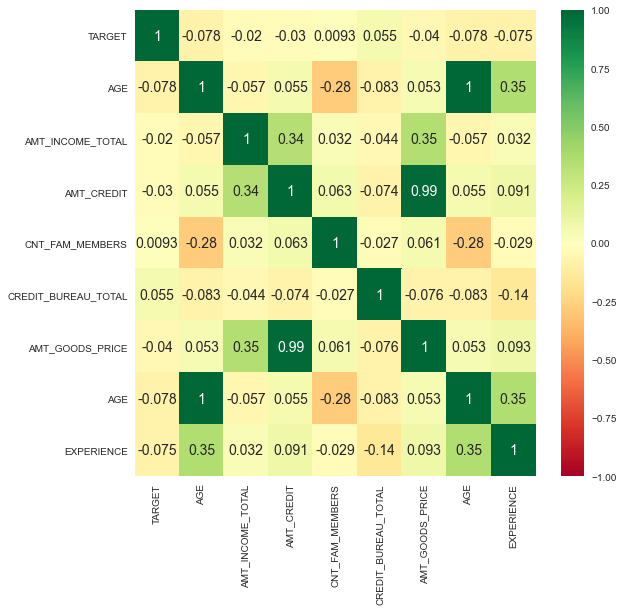

In [149]:
plt.figure(figsize=(8,8))
sns.heatmap(res, annot=True, cmap='RdYlGn', vmin=-1,vmax=1)
plt.show()